In [112]:
import numpy as np
import matplotlib.pyplot as plt

from random import randint
from sklearn.datasets import make_classification

In [113]:
n_samples = 64
n_features = 2
n_informative = 2
n_redundant = 0
n_clusters_per_class = 1
class_sep = 2
random_state = randint(0, 10000)

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_clusters_per_class=n_clusters_per_class,
    class_sep=class_sep,
    random_state=random_state
)

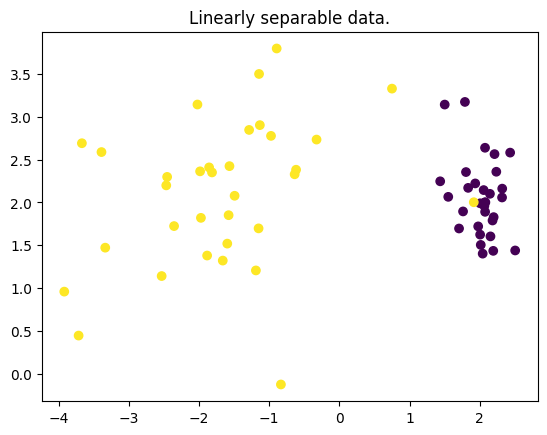

In [114]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Linearly separable data.')
plt.show()

In [115]:
weights = np.ones((X.shape[1] + 1, 1))

In [116]:
weights

array([[1.],
       [1.],
       [1.]])

In [117]:
x_bias = np.hstack((np.ones((X.shape[0], 1)), X))

In [118]:
weights

array([[1.],
       [1.],
       [1.]])

In [119]:
x_bias

array([[ 1.        ,  2.14651253,  2.10085802],
       [ 1.        ,  2.07676575,  2.63882219],
       [ 1.        , -1.28672626,  2.84711917],
       [ 1.        ,  2.50649767,  1.43926472],
       [ 1.        ,  2.08170913,  2.0018356 ],
       [ 1.        , -3.9222394 ,  0.95849842],
       [ 1.        ,  2.01579748,  1.50413156],
       [ 1.        , -2.45558732,  2.29853136],
       [ 1.        , -2.35677506,  1.72408193],
       [ 1.        , -1.14512755,  3.50080701],
       [ 1.        , -2.46807919,  2.19945926],
       [ 1.        , -0.97468097,  2.7776398 ],
       [ 1.        , -1.15196559,  1.69728726],
       [ 1.        ,  2.31940114,  2.05802224],
       [ 1.        ,  0.75026624,  3.32952062],
       [ 1.        ,  2.21197141,  2.56467172],
       [ 1.        , -1.19010277,  1.20602231],
       [ 1.        ,  2.15431041,  1.60354172],
       [ 1.        , -0.3254316 ,  2.73447918],
       [ 1.        ,  2.43481986,  2.58214159],
       [ 1.        ,  2.073502  ,  2.000

In [120]:
x_bias[y.T==0] = -x_bias[y.T==0]

In [121]:
x_bias

array([[-1.        , -2.14651253, -2.10085802],
       [-1.        , -2.07676575, -2.63882219],
       [ 1.        , -1.28672626,  2.84711917],
       [-1.        , -2.50649767, -1.43926472],
       [-1.        , -2.08170913, -2.0018356 ],
       [ 1.        , -3.9222394 ,  0.95849842],
       [-1.        , -2.01579748, -1.50413156],
       [ 1.        , -2.45558732,  2.29853136],
       [ 1.        , -2.35677506,  1.72408193],
       [ 1.        , -1.14512755,  3.50080701],
       [ 1.        , -2.46807919,  2.19945926],
       [ 1.        , -0.97468097,  2.7776398 ],
       [ 1.        , -1.15196559,  1.69728726],
       [-1.        , -2.31940114, -2.05802224],
       [ 1.        ,  0.75026624,  3.32952062],
       [-1.        , -2.21197141, -2.56467172],
       [ 1.        , -1.19010277,  1.20602231],
       [-1.        , -2.15431041, -1.60354172],
       [ 1.        , -0.3254316 ,  2.73447918],
       [-1.        , -2.43481986, -2.58214159],
       [-1.        , -2.073502  , -2.000

In [122]:
learning_rate = .02
duration = 100

In [123]:
weights

array([[1.],
       [1.],
       [1.]])

In [124]:
np.where(x_bias@weights>0, 1, -1)

array([[-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1]])

In [125]:
# vectorized mapping for checking if classification was ok

class_validity_map_template = {
    1: 0,
    -1: 1
}
vectorized_map = np.vectorize(class_validity_map_template.get)

In [126]:
y.size

64

In [127]:
# find elements that are not correctly classified
_wrong_classification = (vectorized_map(np.where(x_bias@weights>0, 1, -1)) != y.reshape(y.size, 1))

# to pass this index correctly use:
x_bias[_wrong_classification[:, 0]]

array([[-1.        , -2.14651253, -2.10085802],
       [-1.        , -2.07676575, -2.63882219],
       [ 1.        , -1.28672626,  2.84711917],
       [-1.        , -2.50649767, -1.43926472],
       [-1.        , -2.08170913, -2.0018356 ],
       [-1.        , -2.01579748, -1.50413156],
       [ 1.        , -2.45558732,  2.29853136],
       [ 1.        , -2.35677506,  1.72408193],
       [ 1.        , -1.14512755,  3.50080701],
       [ 1.        , -2.46807919,  2.19945926],
       [ 1.        , -0.97468097,  2.7776398 ],
       [ 1.        , -1.15196559,  1.69728726],
       [-1.        , -2.31940114, -2.05802224],
       [ 1.        ,  0.75026624,  3.32952062],
       [-1.        , -2.21197141, -2.56467172],
       [ 1.        , -1.19010277,  1.20602231],
       [-1.        , -2.15431041, -1.60354172],
       [ 1.        , -0.3254316 ,  2.73447918],
       [-1.        , -2.43481986, -2.58214159],
       [-1.        , -2.073502  , -2.00060666],
       [-1.        , -1.79022462, -3.174

In [128]:
x_bias[_wrong_classification[:, 0]]

array([[-1.        , -2.14651253, -2.10085802],
       [-1.        , -2.07676575, -2.63882219],
       [ 1.        , -1.28672626,  2.84711917],
       [-1.        , -2.50649767, -1.43926472],
       [-1.        , -2.08170913, -2.0018356 ],
       [-1.        , -2.01579748, -1.50413156],
       [ 1.        , -2.45558732,  2.29853136],
       [ 1.        , -2.35677506,  1.72408193],
       [ 1.        , -1.14512755,  3.50080701],
       [ 1.        , -2.46807919,  2.19945926],
       [ 1.        , -0.97468097,  2.7776398 ],
       [ 1.        , -1.15196559,  1.69728726],
       [-1.        , -2.31940114, -2.05802224],
       [ 1.        ,  0.75026624,  3.32952062],
       [-1.        , -2.21197141, -2.56467172],
       [ 1.        , -1.19010277,  1.20602231],
       [-1.        , -2.15431041, -1.60354172],
       [ 1.        , -0.3254316 ,  2.73447918],
       [-1.        , -2.43481986, -2.58214159],
       [-1.        , -2.073502  , -2.00060666],
       [-1.        , -1.79022462, -3.174

In [129]:
learning_term = learning_rate/2
for _ in range(duration):
    hard_limiter = np.where(x_bias @ weights>0, 1, -1)
    errors = (1 - hard_limiter)
    update_term = learning_term * errors
    weights = weights + x_bias.T @ update_term

In [130]:
weights

array([[ 0.76      ],
       [-0.85991857],
       [ 0.1680503 ]])

# plot

In [131]:
x1_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x2_vals = - (weights[0] + weights[1] * x1_vals) / weights[2]

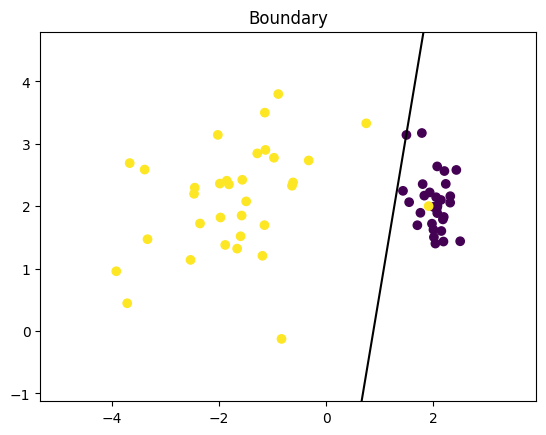

In [132]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x1_vals, x2_vals, 'k-')
plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
plt.title('Boundary')
plt.show()